### Forecasting AV penetration rate using bass diffusion model
 

#### 1. Model Results
The optimal values of p, q, and m for each dataset have been determined using the Bass Diffusion Model, as outlined in the R script. However, estimating the optimal parameters for Autonomous Vehicles (AVs) requires further analysis. Despite the potential for AVs to be as revolutionary as the internet, it is unlikely that customers would embrace them as readily as they did the internet, given their high sales price. Although the price point may be comparable to that of the Nissan Leaf, AVs are expected to be more advanced than electric vehicles. 
 
As a compromise, this research proposes a coefficient of innovation of *0.003274* for AVs, which is the average of the coefficients of innovation. Regarding the parameter q, the study adopts the value of the Nissan Leaf since imitators would likely follow the trend in car purchases established by EVs. The approach of Lavasani et al. (2016) is employed to quantify the potential market size, assuming that 75% of all households in a nation would be the market size for AVs. In the UK, the number of households is 27.8 million (Office for National Statistics, 2022), resulting in a potential market size of 20,850,000. Finally, based on previous literature, the starting year for the AV market is assumed to be 2025.


In [1]:
# Coefficients
import pandas as pd
import math

p=0.003274 # coefficient of innovation: mean between the coefficients of innovation
q=0.327053 #coefficient of imitation: R output (nissan leaf registered)
m=20850000 #market size: 75% of all households in a nation

The Bass Diffusion Models are depicted below using the input values of *p=0.003274*, *q=0.327053*, and *m=20,850,000*

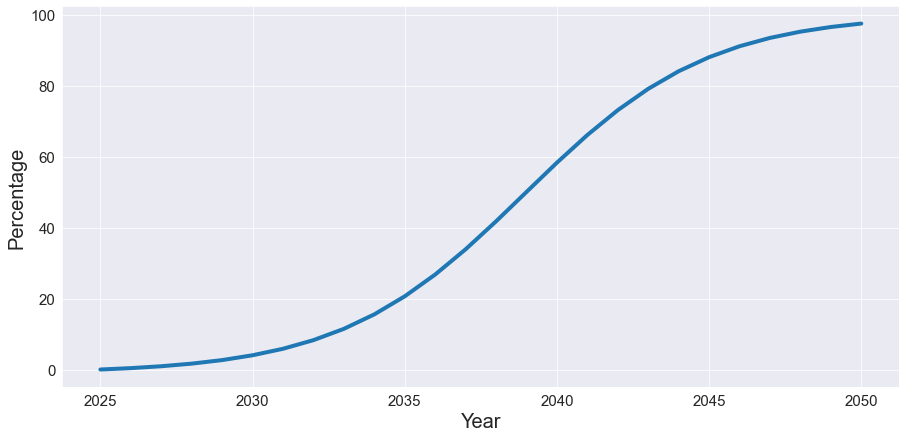

In [2]:
ex=[]

for i in range(0,26):
    ex.append(m*((1-math.exp(-(p+q)*i)))/(1+(q/p)*math.exp(-(p+q)*i)))

import numpy as np
year=np.arange(2025,2051)

bass = pd.DataFrame({"year":year, "number":ex})
bass["percentage"]=bass.number/m*100


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(x = "year",y="percentage", data = bass,linewidth = 4)



plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Percentage", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


It should be noted that for the subsequent analysis, the market size has been converted into a percentage. As demonstrated in the figure, the penetration rate follows an S-curve; it exhibits slow initial uptake, which then accelerates exponentially. While the penetration rate in 2030 remains below 10%, it is expected to surge to 90% by 2045. By 2050, AVs are projected to have a significant presence in the market.
 
However, this projection seems overly optimistic, and the starting year remains uncertain. Additionally, the market size is hypothetical. Therefore, a sensitivity analysis, which is commonly used for uncertain situations, needs to be conducted.

#### 2. Sensitivity Analysis
Regarding the potential market size, it will be reduced to 75% and 50%. Along with the 2030 scenario, a summary of each situation and a graphical representation is presented in the following table and figure.

![alt text](table.png "table")

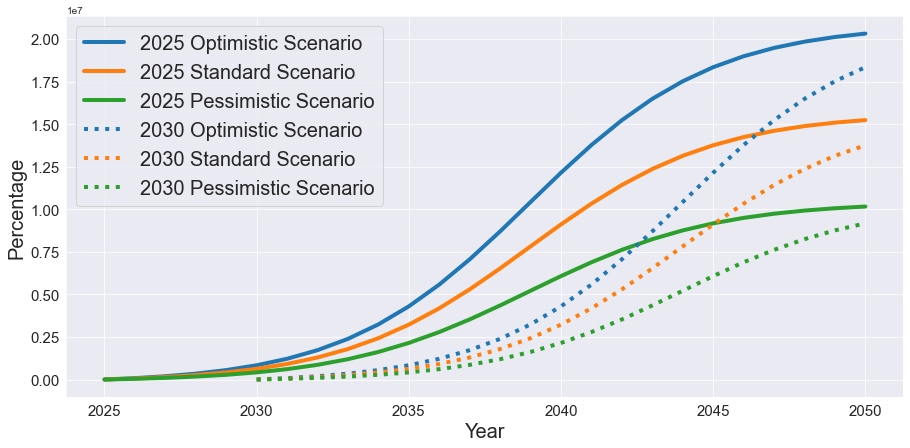

In [3]:
# other market sizes
m2=m*0.75 # Standard
m3=m*0.5 # Pessimistic

#2025 Optimistic
ex=[]

for i in range(0,26):
    ex.append(m*((1-math.exp(-(p+q)*i)))/(1+(q/p)*math.exp(-(p+q)*i)))

import numpy as np
year=np.arange(2025,2051)

bass = pd.DataFrame({"year":year, "number":ex})
bass["percentage"]=bass.number/m*100

#2025 Standard
ex2=[]

for i in range(0,26):
    ex2.append(m2*((1-math.exp(-(p+q)*i)))/(1+(q/p)*math.exp(-(p+q)*i)))

import numpy as np
year=np.arange(2025,2051)

bass2 = pd.DataFrame({"year":year, "number":ex2})
bass2["percentage"]=bass2.number/m2*100

#2025 Pessimistic
ex3=[]

for i in range(0,26):
    ex3.append(m3*((1-math.exp(-(p+q)*i)))/(1+(q/p)*math.exp(-(p+q)*i)))

import numpy as np
year=np.arange(2025,2051)

bass3 = pd.DataFrame({"year":year, "number":ex3})
bass3["percentage"]=bass3.number/m3*100


#2030 Optimistic
ex4=[]

for i in range(0,21):
    ex4.append(m*((1-math.exp(-(p+q)*i)))/(1+(q/p)*math.exp(-(p+q)*i)))

year=np.arange(2030,2051)

bass2030 = pd.DataFrame({"year":year, "number":ex4})
bass2030["percentage"]=bass2030.number/m*100
bass2030

#2030 Standard
ex5=[]

for i in range(0,21):
    ex5.append(m2*((1-math.exp(-(p+q)*i)))/(1+(q/p)*math.exp(-(p+q)*i)))

year=np.arange(2030,2051)

bass2030_2 = pd.DataFrame({"year":year, "number":ex5})
bass2030_2["percentage"]=bass2030_2.number/m2*100

#2030 Pessimistic
ex6=[]

for i in range(0,21):
    ex6.append(m3*((1-math.exp(-(p+q)*i)))/(1+(q/p)*math.exp(-(p+q)*i)))

year=np.arange(2030,2051)

bass2030_3 = pd.DataFrame({"year":year, "number":ex6})
bass2030_3["percentage"]=bass2030_3.number/m3*100



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(x = "year",y="number",color='tab:blue', linewidth = 4, data = bass,label='2025 Optimistic Scenario')
sns.lineplot(x = "year",y="number",color='tab:orange', linewidth = 4,data = bass2,label='2025 Standard Scenario')
sns.lineplot(x = "year",y="number",color='tab:green',linewidth = 4, data = bass3,label='2025 Pessimistic Scenario')
sns.lineplot(x = "year",y="number",linewidth = 4,linestyle='dotted', data = bass2030,label='2030 Optimistic Scenario')
sns.lineplot(x = "year",y="number",linewidth = 4,linestyle='dotted', data = bass2030_2,label='2030 Standard Scenario')
sns.lineplot(x = "year",y="number",linewidth = 4,linestyle='dotted', data = bass2030_3,label='2030 Pessimistic Scenario')

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,1,2,3,4,5]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize = 20,loc='upper left' )

plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Percentage", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


The optimum and optimistic Bass Diffusion rate is referred to as the "Optimistic Scenario," while the penetration rates with 75% and 50% market size are referred to as the "Standard" and "Pessimistic" scenarios, respectively. A total of six scenarios are created, divided by the years.
The figure illustrates that none of the scenarios, except for the original 2025 Optimistic Scenario, would achieve a diffusion rate of over 90% by 2050. The 2025 and 2030 Standard Scenarios are expected to exhibit a rate of less than 80%, while the Pessimistic Scenarios are unlikely to achieve even a 50% penetration rate.

In [4]:
# outputs
bass.to_csv('bass2025_op.csv') 
bass2.to_csv('bass2025_st.csv') 
bass3.to_csv('bass2025_ps.csv') 
bass2030.to_csv('bass2030_op.csv') 
bass2030_2.to_csv('bass2030_st.csv') 
bass2030_3.to_csv('bass2030_ps.csv') 